In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd gdrive/My Drive/dvl/Mask_RCNN/DEFAULT_LOGS_DIR/results_test

/content/gdrive/My Drive/dvl/Mask_RCNN/DEFAULT_LOGS_DIR/results_test


In [ ]:
import os
import json
import pandas as pd

# load json with results
iou_results = {}
leaf_error_results = {}

for result in os.listdir():
    if 'iou' in result:
        with open(result, 'r') as fp:
            data = json.load(fp)
            iou_results[result.split('.')[0]] = eval(data)
    if 'error' in result:
        with open(result, 'r') as fp:
            data = json.load(fp)
            leaf_error_results[result.split('.')[0]] = eval(data)
        

In [ ]:
# put together the iou df
iou = pd.DataFrame.from_dict(iou_results)
iou['picture_mean'] = iou.mean(axis=1)
iou = iou.T
iou['model_mean'] = round(iou.mean(axis=1),3)
iou

,0,1,2,3,4,5,6,7,8,9,10,model_mean
model_1_iou,0.652000,0.881000,0.523000,0.647000,0.846000,0.590000,0.754,0.591000,0.605000,0.600000,0.670000,0.669
model_2_iou,0.655000,0.828000,0.599000,0.649000,0.858000,0.516000,0.765,0.643000,0.641000,0.542000,0.671000,0.670
model_3_iou,0.723000,0.873000,0.623000,0.783000,0.876000,0.690000,0.761,0.693000,0.743000,0.538000,0.758000,0.733
model_4_iou,0.794000,0.887000,0.662000,0.776000,0.878000,0.709000,0.795,0.717000,0.685000,0.637000,0.764000,0.755
model_5_iou,0.548000,0.675000,0.489000,0.534000,0.687000,0.456000,0.717,0.358000,0.544000,0.600000,0.556000,0.560
model_6_iou,0.508000,0.603000,0.513000,0.496000,0.620000,0.406000,0.567,0.455000,0.547000,0.441000,0.611000,0.524
model_7_iou,0.506000,0.623000,0.376000,0.504000,0.587000,0.346000,0.484,0.364000,0.504000,0.444000,0.462000,0.473
model_8_iou,0.753000,0.862000,0.598000,0.775000,0.829000,0.666000,0.793,0.632000,0.765000,0.637000,0.773000,0.735
model_9_iou,0.744000,0.818000,0.520000,0.775000,0.845000,0.565000,0.754,0.616000,0.652000,0.591000,0.781000,0.696
picture_mean,0.653667,0.783333,0.544778,0.659889,0.780667,0.549333,0.710,0.563222,0.631778,0.558889,0.671778,0.646


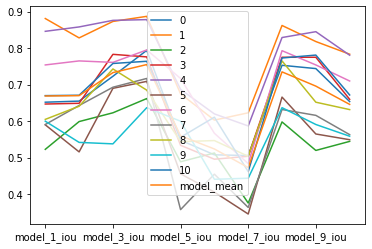

In [ ]:
iou.plot()

In [ ]:
# put together the iou df
leaf_error = pd.DataFrame.from_dict(leaf_error_results)
leaf_error['picture_mean'] = leaf_error.mean(axis=1)
leaf_error = leaf_error.T
leaf_error['model_mean'] = round(leaf_error.mean(axis=1),3)
leaf_error

,0,1,2,3,4,5,6,7,8,9,10,model_mean
model_1_error,0.231000,-0.188000,0.300000,0.385000,0.000000,-0.071000,0.062000,0.133000,0.417,0.250000,0.000000,0.138
model_2_error,0.333000,-0.071000,0.300000,0.385000,-0.067000,0.000000,0.062000,0.062000,0.308,0.429000,-0.067000,0.152
model_3_error,-0.158000,-0.278000,0.000000,-0.053000,-0.300000,-0.278000,-0.056000,-0.190000,-0.056,0.250000,-0.222000,-0.122
model_4_error,-0.238000,-0.235000,0.000000,-0.053000,-0.125000,-0.278000,-0.190000,-0.227000,-0.150,0.000000,-0.333000,-0.166
model_5_error,0.455000,0.083000,0.625000,0.636000,0.167000,0.182000,0.133000,1.429000,0.417,0.429000,0.400000,0.451
model_6_error,0.778000,0.444000,0.444000,0.800000,0.273000,0.444000,0.417000,0.545000,0.417,1.000000,0.167000,0.521
model_7_error,0.778000,0.444000,0.857000,0.800000,0.556000,0.857000,0.700000,1.429000,0.545,1.000000,0.750000,0.792
model_8_error,-0.200000,-0.235000,0.000000,0.000000,-0.067000,-0.235000,-0.190000,-0.105000,-0.105,0.000000,-0.364000,-0.136
model_9_error,-0.059000,-0.133000,0.083000,0.125000,-0.067000,-0.071000,0.000000,-0.105000,0.214,0.250000,-0.222000,0.001
picture_mean,0.213333,-0.018778,0.289889,0.336111,0.041111,0.061111,0.104222,0.330111,0.223,0.400889,0.012111,0.181


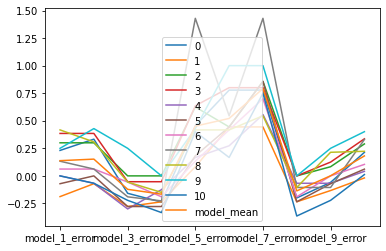

In [ ]:
leaf_error.plot()